In [1]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')]
print(tokens,'\n')
unique = set(tokens)
unique = list(unique)
print(unique,'\n')
token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]] = i
print(token2idx, '\n')
encode = [token2idx[x] for x in tokens]
encode

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라.'] 

['그리고', '내일', '죽을', '살아라.', '평생', '꿈을', '것처럼', '오늘을', '살', '꾸어라.'] 

{'그리고': 0, '내일': 1, '죽을': 2, '살아라.': 3, '평생': 4, '꿈을': 5, '것처럼': 6, '오늘을': 7, '살': 8, '꾸어라.': 9} 



[4, 8, 6, 5, 9, 0, 1, 2, 6, 7, 3]

[과제] 상기 작업을 keras를 이용하여 수행하세요.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

t = Tokenizer()
t.fit_on_texts([text]) # Tokenizer().fit_on_texts()에는 텍스트로 이루어진 리스트를 넣어야 함
print(t.word_index) # 딕셔너리로 표현됨 : {'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}

encoded = t.texts_to_sequences([text])[0]
print(encoded) # [2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 1000, max_len=100

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]}\n{label}')

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

In [5]:
# pad_sequence() : 데이터의 maxlen 보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [6]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(pad_x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 0.5677 - accuracy: 0.7128 - val_loss: 0.4191 - val_accuracy: 0.8080
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3723 - accuracy: 0.8338 - val_loss: 0.3809 - val_accuracy: 0.8270
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3351 - accuracy: 0.8549 - val_loss: 0.3839 - val_accuracy: 0.8228
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3079 - accuracy: 0.8706 - val_loss: 0.3874 - val_accuracy: 0.8242
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2778 - accuracy: 0.8857 - val_loss: 0.3958 - val_accuracy: 0.8192
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2462 - accuracy: 0.9050 - val_loss: 0.4083 - val_accuracy: 0.8170
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2129 - accuracy: 0.9230 - val_loss: 0.4244 - val_accuracy: 0.8126
Epoch 

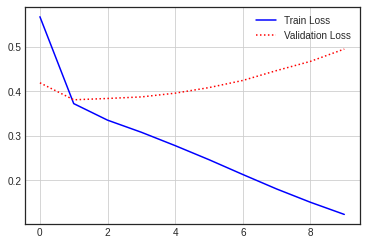

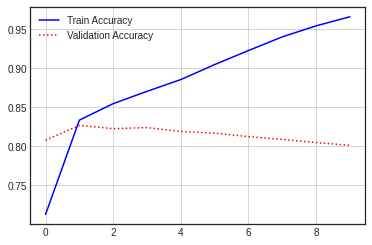

In [9]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()


[과제] imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 2000, max_len=400

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 2000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

In [11]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]}\n{label}')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119,

In [12]:
# pad_sequence() : 데이터의 maxlen 보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_len = 400

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [13]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(pad_x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4975 - accuracy: 0.7501 - val_loss: 0.3360 - val_accuracy: 0.8632
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2785 - accuracy: 0.8845 - val_loss: 0.3011 - val_accuracy: 0.8776
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2302 - accuracy: 0.9093 - val_loss: 0.2991 - val_accuracy: 0.8800
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1888 - accuracy: 0.9278 - val_loss: 0.3171 - val_accuracy: 0.8694
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1476 - accuracy: 0.9488 - val_loss: 0.3371 - val_accuracy: 0.8684
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1109 - accuracy: 0.9665 - val_loss: 0.3502 - val_accuracy: 0.8690
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0807 - accuracy: 0.9776 - val_loss: 0.3793 - val_accuracy: 0.8668
Epoch 

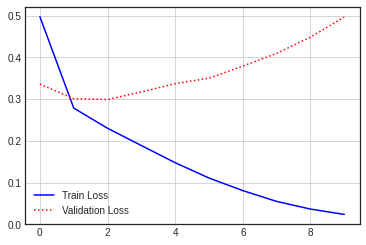

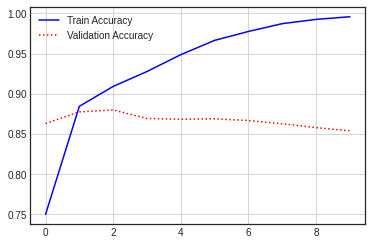

In [16]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history

plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()
